In [131]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns; sns.set();
import matplotlib.pyplot as plt
import mglearn
import graphviz
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

In [132]:
dataset = pd.read_csv("Covid19_Symptoms.csv")
dataset.head(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [133]:
dataset.shape

(316800, 27)

In [134]:
dataset.dtypes

Fever                       int64
Tiredness                   int64
Dry-Cough                   int64
Difficulty-in-Breathing     int64
Sore-Throat                 int64
None_Sympton                int64
Pains                       int64
Nasal-Congestion            int64
Runny-Nose                  int64
Diarrhea                    int64
None_Experiencing           int64
Age_0-9                     int64
Age_10-19                   int64
Age_20-24                   int64
Age_25-59                   int64
Age_60+                     int64
Gender_Female               int64
Gender_Male                 int64
Gender_Transgender          int64
Severity_Mild               int64
Severity_Moderate           int64
Severity_None               int64
Severity_Severe             int64
Contact_Dont-Know           int64
Contact_No                  int64
Contact_Yes                 int64
Country                    object
dtype: object

In [135]:
unused = ['Gender_Female', 'Gender_Male', 'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes', 'Country', 'None_Sympton']

In [136]:
dataset = dataset.drop(columns = unused)

In [137]:
dataset.head(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe
0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0
1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0
2,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0
3,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0
4,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0


In [138]:
dataset.dtypes

Fever                      int64
Tiredness                  int64
Dry-Cough                  int64
Difficulty-in-Breathing    int64
Sore-Throat                int64
Pains                      int64
Nasal-Congestion           int64
Runny-Nose                 int64
Diarrhea                   int64
None_Experiencing          int64
Age_0-9                    int64
Age_10-19                  int64
Age_20-24                  int64
Age_25-59                  int64
Age_60+                    int64
Severity_Mild              int64
Severity_Moderate          int64
Severity_None              int64
Severity_Severe            int64
dtype: object

In [139]:
dataset.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
dtype: int64

In [140]:
severity_columns = dataset.filter(like='Severity_').columns
dataset['Severity_None'].replace({1:'None',0:'No'},inplace =True)
dataset['Severity_Mild'].replace({1:'Mild',0:'No'},inplace =True)
dataset['Severity_Moderate'].replace({1:'Moderate',0:'No'},inplace =True)
dataset['Severity_Severe'].replace({1:'Severe',0:'No'},inplace =True)

In [141]:
dataset.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe
0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,Mild,No,No,No
1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,Mild,No,No,No
2,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,Mild,No,No,No
3,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,No,Moderate,No,No
4,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,No,Moderate,No,No


In [142]:
dataset['Severity']=dataset[severity_columns].values.tolist()

In [143]:
dataset['Severity']

0             [Mild, No, No, No]
1             [Mild, No, No, No]
2             [Mild, No, No, No]
3         [No, Moderate, No, No]
4         [No, Moderate, No, No]
                   ...          
316795      [No, No, No, Severe]
316796      [No, No, No, Severe]
316797        [No, No, None, No]
316798        [No, No, None, No]
316799        [No, No, None, No]
Name: Severity, Length: 316800, dtype: object

In [144]:
def removing(listSeverity):
    listSeverity = set(listSeverity) 
    listSeverity.discard("No")
    newListSeverity = ''.join(listSeverity)
    return newListSeverity

In [145]:
dataset['Severity'] = dataset['Severity'].apply(removing)

In [146]:
dataset.head(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Severity
0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,Mild,No,No,No,Mild
1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,Mild,No,No,No,Mild
2,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,Mild,No,No,No,Mild
3,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,No,Moderate,No,No,Moderate
4,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,No,Moderate,No,No,Moderate


In [147]:
age_columns = dataset.filter(like='Age_').columns
dataset['Age_0-9'].replace({1:'0-9',0:'No'},inplace =True)
dataset['Age_10-19'].replace({1:'10-19',0:'No'},inplace =True)
dataset['Age_20-24'].replace({1:'20-24',0:'No'},inplace =True)
dataset['Age_25-59'].replace({1:'25-59',0:'No'},inplace =True)
dataset['Age_60+'].replace({1:'60+',0:'No'},inplace =True)

In [148]:
dataset['Age']=dataset[age_columns].values.tolist()

In [149]:
def removing(listAge):
    listAge = set(listAge) 
    listAge.discard("No")
    newListAge = ''.join(listAge)
    return newListAge

In [150]:
dataset['Age'] = dataset['Age'].apply(removing)

In [151]:
dataset.head(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,...,Age_10-19,Age_20-24,Age_25-59,Age_60+,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Severity,Age
0,1,1,1,1,1,1,1,1,1,0,...,No,No,No,No,Mild,No,No,No,Mild,0-9
1,1,1,1,1,1,1,1,1,1,0,...,No,No,No,No,Mild,No,No,No,Mild,0-9
2,1,1,1,1,1,1,1,1,1,0,...,No,No,No,No,Mild,No,No,No,Mild,0-9
3,1,1,1,1,1,1,1,1,1,0,...,No,No,No,No,No,Moderate,No,No,Moderate,0-9
4,1,1,1,1,1,1,1,1,1,0,...,No,No,No,No,No,Moderate,No,No,Moderate,0-9


In [152]:
duplicates = ['Age_0-9','Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Severity_Mild', 'Severity_Moderate', 'Severity_None', 'Severity_Severe']
dataset = dataset.drop(columns=duplicates)

In [153]:
dataset.head(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Severity,Age
0,1,1,1,1,1,1,1,1,1,0,Mild,0-9
1,1,1,1,1,1,1,1,1,1,0,Mild,0-9
2,1,1,1,1,1,1,1,1,1,0,Mild,0-9
3,1,1,1,1,1,1,1,1,1,0,Moderate,0-9
4,1,1,1,1,1,1,1,1,1,0,Moderate,0-9


In [154]:
dataset.shape

(316800, 12)

In [155]:
age_mapping = {
    "0-9": 1,
    "10-19": 2,
    "20-24": 3,
    "25-59": 4,
    "60+": 5
}

In [156]:
dataset['Age'] = dataset['Age'].map(age_mapping)
dataset

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Severity,Age
0,1,1,1,1,1,1,1,1,1,0,Mild,1
1,1,1,1,1,1,1,1,1,1,0,Mild,1
2,1,1,1,1,1,1,1,1,1,0,Mild,1
3,1,1,1,1,1,1,1,1,1,0,Moderate,1
4,1,1,1,1,1,1,1,1,1,0,Moderate,1
...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,0,0,0,0,1,Severe,5
316796,0,0,0,0,0,0,0,0,0,1,Severe,5
316797,0,0,0,0,0,0,0,0,0,1,None,5
316798,0,0,0,0,0,0,0,0,0,1,None,5


<AxesSubplot:>

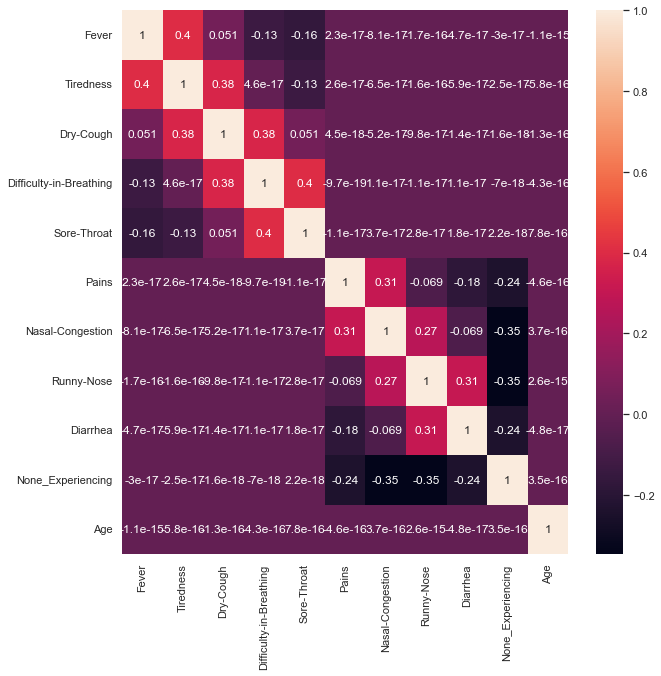

In [157]:
f,ax= plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True)

In [158]:
def count_percentage(columns, category):
    df = dataset[dataset[columns] == category]
    print(df.shape)
    df = (df.shape[0]/dataset.shape[0])*100
    print(columns + ' ' + str(category) + ' Percentage: ', round(df), '%')

In [159]:
count_percentage("Severity", "None")

(79200, 12)
Severity None Percentage:  25 %


In [160]:
count_percentage("Severity", "Mild")

(79200, 12)
Severity Mild Percentage:  25 %


In [161]:
count_percentage("Severity", "Moderate")

(79200, 12)
Severity Moderate Percentage:  25 %


In [162]:
count_percentage("Severity", "Severe")

(79200, 12)
Severity Severe Percentage:  25 %


In [163]:
count_percentage("Sore-Throat", 1)

(99000, 12)
Sore-Throat 1 Percentage:  31 %


In [164]:
symptoms = ['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea']
features = dataset[symptoms]

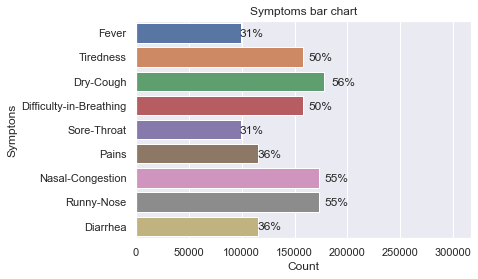

In [165]:
temp = []
for i in symptoms:
    temp.append(sum(features[i].values))
temp_df = pd.DataFrame({"Symptons":symptoms, "Count":temp})
fig, ax = plt.subplots()
sns.barplot(data = temp_df, y="Symptons", x="Count", ax=ax)
ax.set_xlim(0, dataset.shape[0])
ax.set_title("Symptoms bar chart")
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{width/dataset.shape[0]:.0%}', 
                (x + width*1.1, y + height*0.7), ha='center')

In [166]:
def get_symptom_count(the_list):
    return sum(the_list.values)

In [167]:
feats = dataset
feats['Total_Sympton'] = feats[symptoms].apply(get_symptom_count, axis=1)

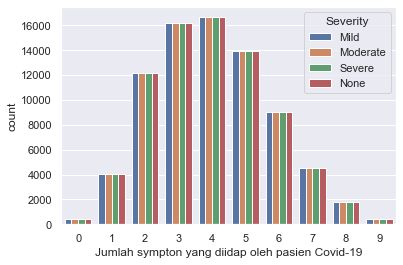

In [168]:
sns.countplot(data=feats, x='Total_Sympton', hue='Severity')
plt.xlabel("Jumlah sympton yang diidap oleh pasien Covid-19")
plt.show()

In [169]:
drop = ['Severity']

In [170]:
X = dataset
X = X.drop(columns = drop)
y = dataset['Severity']

In [171]:
y

0             Mild
1             Mild
2             Mild
3         Moderate
4         Moderate
            ...   
316795      Severe
316796      Severe
316797        None
316798        None
316799        None
Name: Severity, Length: 316800, dtype: object

In [172]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify = y, random_state=42)

In [173]:
x_test.shape

(79200, 12)

In [174]:
x_train.shape

(237600, 12)

In [175]:
param_dist = {"max_depth": [3, None],
             "min_samples_leaf": randint(1,9),
             "criterion": ["gini", "entropy"]}

In [176]:
cross_val = StratifiedKFold(n_splits = 10)

In [177]:
tree=DecisionTreeClassifier(random_state=0)

In [178]:
tree_cv = RandomizedSearchCV(tree,param_dist, cv=cross_val)

In [179]:
tree_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017C1A30A880>})

In [180]:
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {:.3f}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}
Best score is 0.246


In [181]:
y_pred = tree_cv.predict(x_test)

In [182]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Mild       0.24      0.20      0.22     19800
    Moderate       0.25      0.40      0.30     19800
        None       0.22      0.02      0.04     19800
      Severe       0.25      0.37      0.29     19800

    accuracy                           0.25     79200
   macro avg       0.24      0.25      0.21     79200
weighted avg       0.24      0.25      0.21     79200



In [183]:
tree = DecisionTreeClassifier(max_depth = 3, criterion="entropy", 
                              min_samples_leaf=2, random_state =0)
tree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 0.252
Accuracy on test set: 0.245


In [184]:
from sklearn.tree import export_graphviz
columns = X.columns
severity_class = np.unique(y)
export_graphviz(tree, out_file="Covid19SymptomsTree.dot", 
                class_names=severity_class, feature_names = columns,
                impurity=False, filled=True, rounded = True)

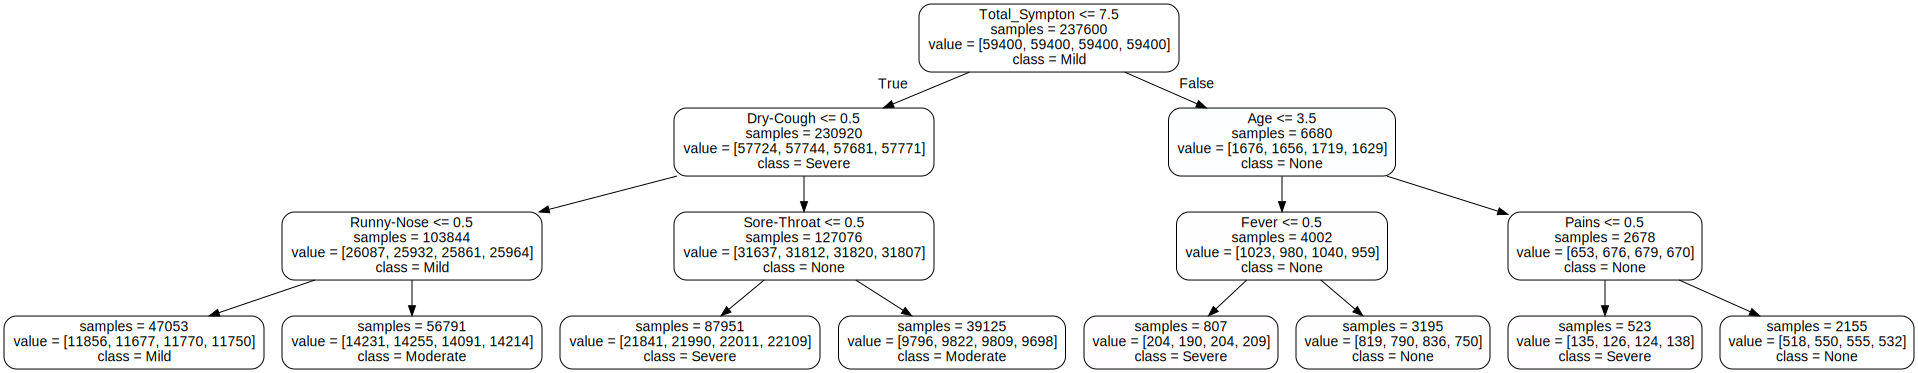

In [185]:
with open("Covid19SymptomsTree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [186]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.15132765 0.         0.11892225 0.         0.13520517 0.14550596
 0.         0.10454632 0.         0.         0.15770351 0.18678915]


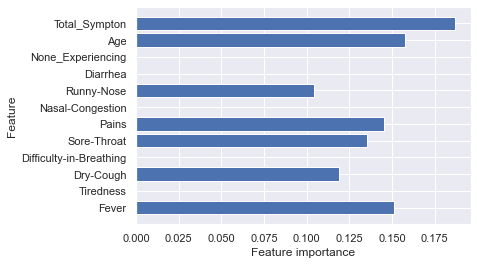

In [187]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances(tree)

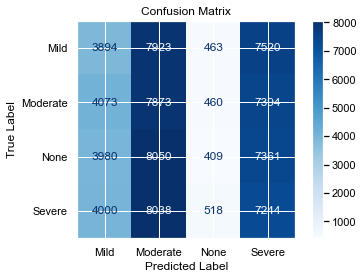

In [188]:
from sklearn.metrics import plot_confusion_matrix
color = 'black'
matrix = plot_confusion_matrix(tree, x_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)